In [1]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 3: Quantization

In this task, you have to write a simple code to change the [Quantisation](https://www.tutorialspoint.com/dip/concept_of_quantization.htm) level of a given digital image. The default quantisation level for digital images are 8-bits (i.e. 256 levels). We will use two different quantisation methods.

* Uniform
* Lloyd Max

Please refer to the class slides on both methods. For other reference you can follow [this](http://www.cspl.umd.edu/631/631pub06_sec8bcompressBasic.pdf) or [this](https://web.stanford.edu/class/ee398a/handouts/lectures/05-Quantization.pdf)

In [2]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-e41cvhwd
  Created wheel for ee604-plugins: filename=ee604_plugins-0.1.4-cp36-none-any.whl size=2305 sha256=d204daeffcde6e32678533ce97ccb82dd8ab1214e7f9bc11c5b8163ad718b6b6
  Stored in directory: /tmp/pip-ephem-wheel-cache-qtzlyvl6/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-e41cvhwd


In [3]:
# Importing required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

from ee604_plugins import download_dataset

download_dataset(assignment_no=1, task_no=3) # download data for this assignment

Download Complete!


### Task 3.1 Quantisation on Grayscale Image

In [4]:
def uniform_quantisatioon(img, quantisation_bit=8):
    '''
    Write a program to change the quantisation level of the given image to 2^quantisation_bit levels. 
    In this one you have to use uniform quantisation.
    
    Inputs:                      
    + quantisation_bit - (Must be <= 8)
                       - Consider uniform quantisation with level from [0, 2^quantisation_bit)
                       - For eg. for 8-bit quantisation - There should be 256 different quantisation levels
                       - for 1-bit quantisation - There should be 2 different quantisation levels
                       - Note that range should always be between 0, 255
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8)
    
    Allowed external package:
    + You are free to use np.histogram module or any suitable module which you will need.
    + You must not use any direct implementation.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    # Replace with your code...
    L = np.power(2, quantisation_bit)

    interval = 255/L

    out_img = np.zeros((img.shape[0], img.shape[1]))
    for x in range(img.shape[1]):
        for y in range(img.shape[0]):
            interval_num = np.round(img[y, x]/interval)
            new_val = interval*interval_num

            out_img[y, x] = int(new_val)

    out_img = np.array(out_img, np.int32)
    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [5]:
def nonuniform_quantisatioon(img, quantisation_bit=8):
    '''
    Write a program to change the quantisation level of the given image to 2^quantisation_bit levels. 
    In this one you have to use Lloyd-Max non-uniform quantisation method.
    
    Inputs:                      
    + quantisation_bit - (Must be <= 8)
                       - Consider uniform quantisation with level from [0, 2^quantisation_bit)
                       - For eg. for 8-bit quantisation - There should be 256 different quantisation levels
                       - for 1-bit quantisation - There should be 2 different quantisation levels i.e. '0' and '255'
                       - Note that range should always between 0, 255
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8)
    
    Allowed external package:
    + You are free to use np.histogram module or any suitable module which you will need.
    + You must not use any direct implementation.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    # Replace with your code...
    L = int(np.power(2, quantisation_bit))

    density = np.zeros((256))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            density[img[i][j]] += 1
    
    rs = sorted(list(np.random.randint(low=0, high=256, size=L+1)))
    ts = np.zeros((L+2))

    ts[1] = 0
    ts[L+1] = 255

    for i in range(2, L+1):
        ts[i] = (rs[i] + rs[i-1])/2

    for p in range(51):
        for k in range(1, L+1):
            lowerbd = int(np.ceil(ts[k]))
            upperbd = int(np.ceil(ts[k+1]))
            num = np.dot(density[lowerbd:upperbd], np.arange(lowerbd, upperbd))
            den = np.sum(density[lowerbd:upperbd])
            if den == 0:
                rs[k] = (ts[k-1] + ts[k])/2
            else:
                rs[k] = num/den
        
        for k in range(2, L+1):
            ts[k] = (rs[k] + rs[k-1])/2
        
        error = 0
        for k in range(1, L+1):
            lowerbd = int(np.ceil(ts[k]))
            upperbd = int(np.ceil(ts[k+1]))
            error += np.dot(density[lowerbd:upperbd], (np.arange(lowerbd, upperbd) - rs[k])**2)
        
        # if p%100 == 0:
        #   print(error)
    
    out_img = np.zeros((img.shape[0], img.shape[1]))
    new_rs = rs[1:]
    new_ts = ts[1:]

    p = np.digitize(img, new_ts)
    
    for i in range(p.shape[0]):
        for j in range(p.shape[1]):
            index = p[i][j]
            if index == len(new_ts):
                index -= 1
            out_img[i][j] = new_rs[index-1]
          
    out_img = np.array(out_img, np.int32)
    #############################
    # End your code here ########
    #############################    
    
    return out_img

#### Quantise the given image for following bit-levels = 2, 4, 6, 8 using both the methods. 
Run below cell to plot images in a pyplot table and write your observation on the differences.

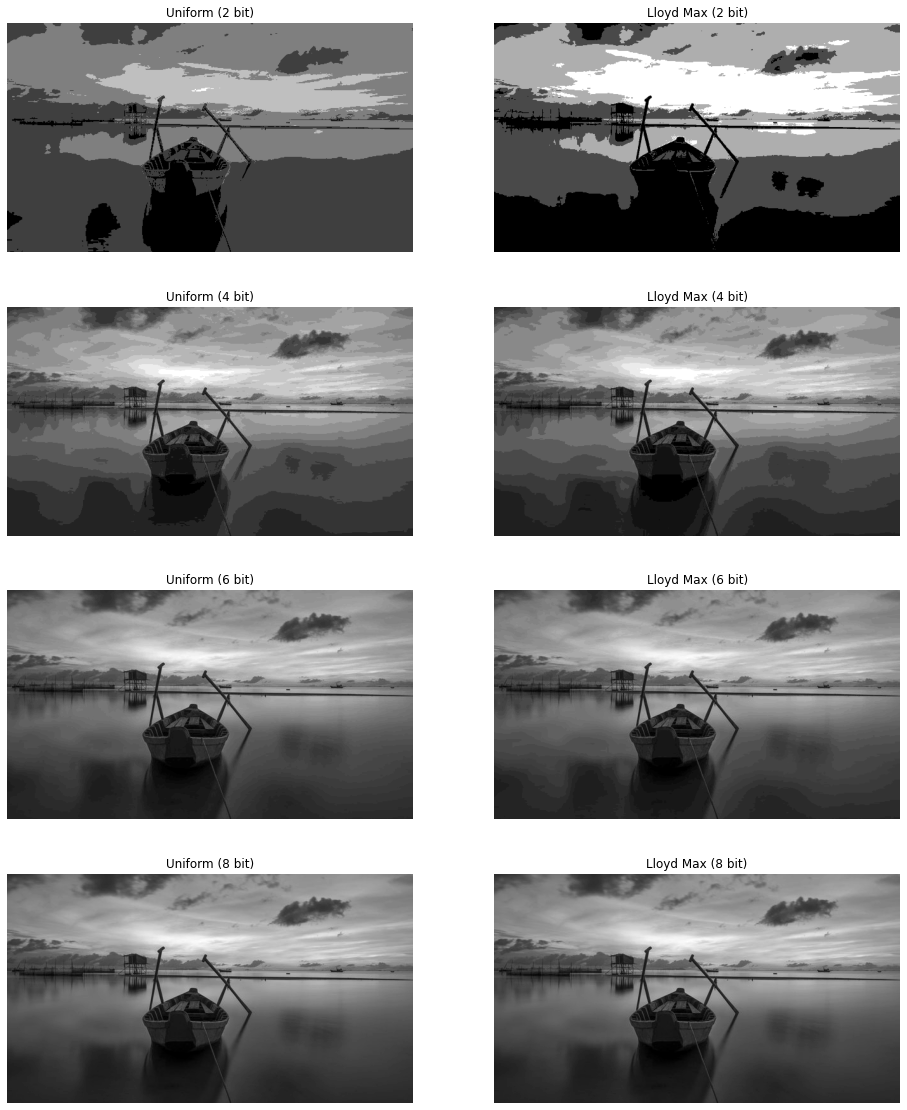

In [6]:
# Do not change codes inside this cell
# Add your observations in next cell

boat_gray = cv2.imread("data/boat_gray.jpg", 0)

def plot_frame(subplot_id, img, name):
    plt.subplot(4, 2, 1 + int(subplot_id))
    plt.imshow(np.uint8(img), cmap="gray")
    plt.axis("off")
    plt.title(name)
    
plt.figure(figsize=(16, 20))

count = 0
for i in [2, 4, 6, 8]:
    img_uni = uniform_quantisatioon(boat_gray, quantisation_bit=i)
    plot_frame(count, img_uni, "Uniform (" + str(i) + " bit)")
    
    img_lloyd = nonuniform_quantisatioon(boat_gray, quantisation_bit=i)
    plot_frame(count+1, img_lloyd, "Lloyd Max (" + str(i) + " bit)")
    
    count += 2
    
plt.show()

In [13]:
your_observation = """
The image quality progressively increases from 2-bit to 8-bit quantization for both uniform and Lloyd-Max quantization. 
The uniform case seems to look aesthetically better for the 2 and 4 bit configurations. The lloyd max quantizer seems to make the image extra dark.
"""

print(your_observation)


The image quality progressively increases from 2-bit to 8-bit quantization for both uniform and Lloyd-Max quantization. 
The uniform case seems to look aesthetically better for the 2 and 4 bit configurations. The lloyd max quantizer seems to make the image extra dark.



### Task 3.2 Quantisation on Colored Images

Use your previous implementation to apply quantisation to each individual channels of colored image "separately".

In [8]:
def uniform_color_quantisatioon(img, quantisation_bit=8):
    '''
    Write a program to change the quantisation level of the given image to 2^quantisation_bit levels. 
    In this one you have to use uniform quantisation.
    
    Inputs:                      
    + quantisation_bit - (Must be <= 8)
                       - Consider uniform quantisation with level from [0, 2^quantisation_bit)
                       - For eg. for 8-bit quantisation - There should be 256 different quantisation levels
                       - for 1-bit quantisation - There should be 2 different quantisation levels
                       - Note that range should always be between 0, 255
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8)
    
    Allowed external package:
    + You are free to use np.histogram module or any suitable module which you will need.
    + You must not use any direct implementation.
    
    Hint:
    + Use uniform_quantisation() to each channel.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    # Replace with your code...
    ch1 = img[:, :, 0]
    ch2 = img[:, :, 1]
    ch3 = img[:, :, 2]

    ch1_quant = uniform_quantisatioon(ch1, quantisation_bit)
    ch2_quant = uniform_quantisatioon(ch2, quantisation_bit)
    ch3_quant = uniform_quantisatioon(ch3, quantisation_bit)

    out_img = np.stack([ch1_quant, ch2_quant, ch3_quant], axis=-1)

    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [9]:
def nonuniform_color_quantisatioon(img, quantisation_bit=8):
    '''
    Write a program to change the quantisation level of the given image to 2^quantisation_bit levels. 
    In this one you have to use Lloyd-Max non-uniform quantisation method.
    
    Inputs:                      
    + quantisation_bit - (Must be <= 8)
                       - Consider uniform quantisation with level from [0, 2^quantisation_bit)
                       - For eg. for 8-bit quantisation - There should be 256 different quantisation levels
                       - for 1-bit quantisation - There should be 2 different quantisation levels i.e. '0' and '255'
                       - Note that range should always between 0, 255
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8)
    
    Allowed external package:
    + You are free to use np.histogram module or any suitable module which you will need.
    + You must not use any direct implementation.
    
    Hint:
    + Use uniform_quantisation() to each channel.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    # Replace with your code...
    ch1 = img[:, :, 0]
    ch2 = img[:, :, 1]
    ch3 = img[:, :, 2]

    ch1_quant = nonuniform_quantisatioon(ch1, quantisation_bit)
    ch2_quant = nonuniform_quantisatioon(ch2, quantisation_bit)
    ch3_quant = nonuniform_quantisatioon(ch3, quantisation_bit)

    out_img = np.stack([ch1_quant, ch2_quant, ch3_quant], axis=-1)
    #############################
    # End your code here ########
    #############################    
    
    return out_img

#### Quantise the given image for following bit-levels = 2, 4, 6, 8 using both the methods. 
Run below cell to plot images in a pyplot table and write your observation on the differences.

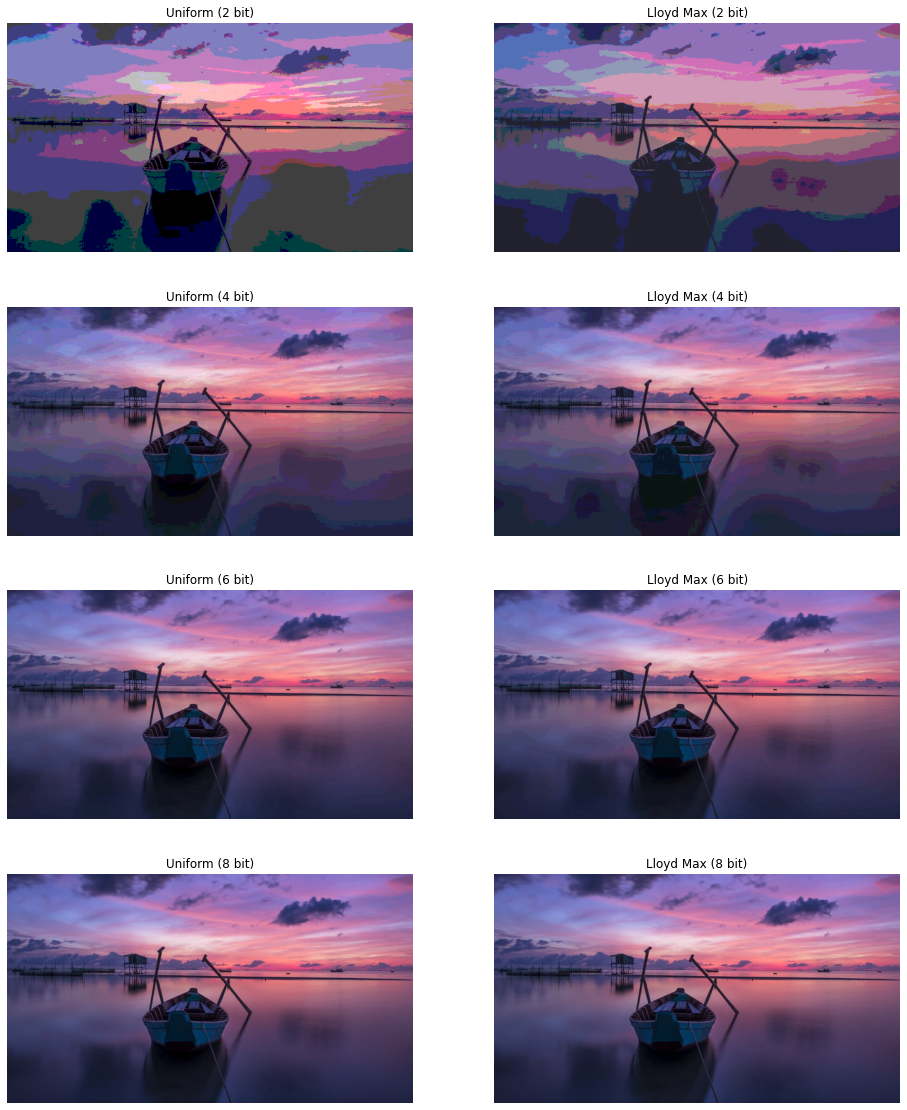

In [10]:
# Do not change codes inside this cell
# Add your observations in next cell

boat_color = cv2.imread("data/boat.jpg")

def plot_frame(subplot_id, img, name):
    plt.subplot(4, 2, 1 + int(subplot_id))
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")
    plt.title(name)
    
plt.figure(figsize=(16, 20))

count = 0
for i in [2, 4, 6, 8]:
    img_uni = uniform_color_quantisatioon(boat_color, quantisation_bit=i)
    plot_frame(count, img_uni, "Uniform (" + str(i) + " bit)")
    
    img_lloyd = nonuniform_color_quantisatioon(boat_color, quantisation_bit=i)
    plot_frame(count+1, img_lloyd, "Lloyd Max (" + str(i) + " bit)")
    
    count += 2
    
plt.show()

In [14]:
your_observation = """
Here the uniform quantizer performs poorly for the 2-bit case and quality progressively increases as the number of bits increase.

The lloyd max quantizer displays a similar trend as well. Overall, the results of the lloyd max quantizer seem better compared to the uniform one for 2 and 4 bit cases.
Even in 6 and 8 bit cases the lloyd max quantizer seems to give a richer image.
"""

print(your_observation)


Here the uniform quantizer performs poorly for the 2-bit case and quality progressively increases as the number of bits increase.

The lloyd max quantizer displays a similar trend as well. Overall, the results of the lloyd max quantizer seem better compared to the uniform one for 2 and 4 bit cases.
Even in 6 and 8 bit cases the lloyd max quantizer seems to give a richer image.

